# BUSINESS PERFORMANCE MANAGEMENT :CRM Analysis

## Problem Statement
To explore the factors influencing company revenue across various sectors and office locations, identifying key trends and relationships that can inform strategic business decisions.

## Descriptive statistics and visualizations
We will analyze the dataset to answer the following questions:
1. What is the average revenue for companies in each sector?
2. What is the revenue distribution for companies across different office locations?
3. Which sector has the highest average revenue?
4. What are the top-performing office locations based on average revenue?

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the dataset
file_path = Path('accounts.csv')
dataset = pd.read_csv(file_path)


# Display first few rows
dataset.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


### Sector-wise Revenue Analysis

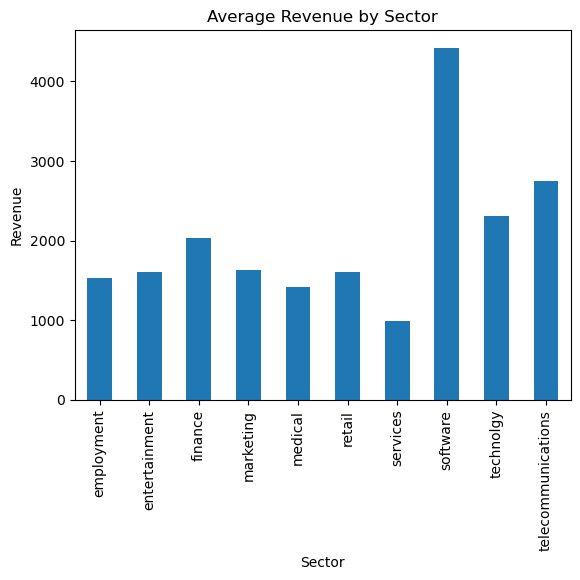

In [11]:
# Calculate average revenue per sector
sector_revenue = dataset.groupby('sector')['revenue'].mean()
sector_revenue.plot(kind='bar', title='Average Revenue by Sector', ylabel='Revenue', xlabel='Sector')
plt.show()

### Location-wise Revenue Analysis

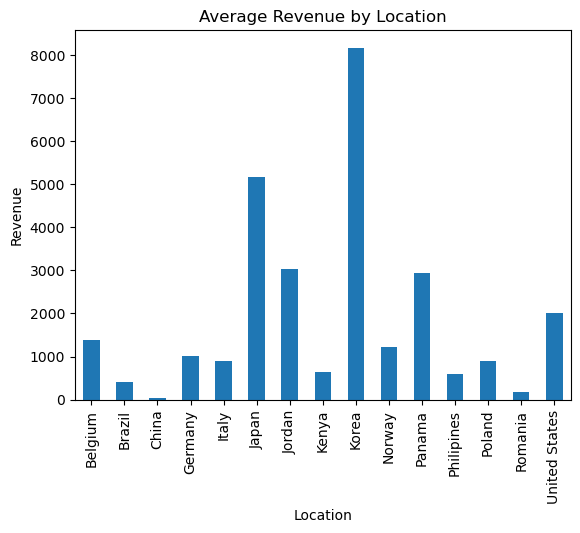

In [12]:
# Calculate average revenue per office location
location_revenue = dataset.groupby('office_location')['revenue'].mean()
location_revenue.plot(kind='bar', title='Average Revenue by Location', ylabel='Revenue', xlabel='Location')
plt.show()

### Revenue distribution

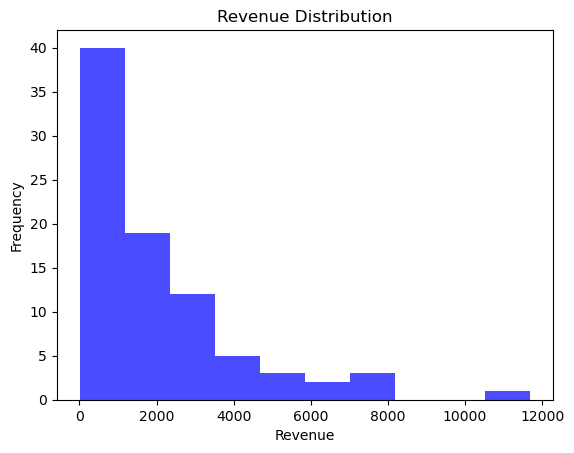

In [13]:
# Visualize revenue distribution with a histogram
plt.hist(dataset['revenue'], bins=10, color='blue', alpha=0.7)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

### Box Plot: Revenue by sector

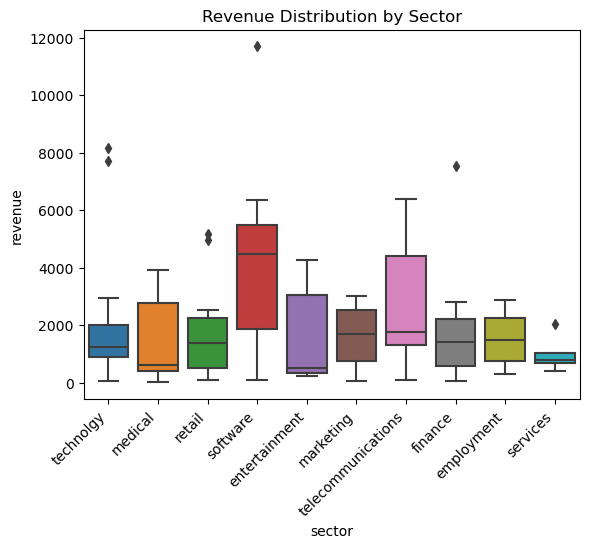

In [14]:
# Box plot to compare revenue ranges by sector

sns.boxplot(x='sector', y='revenue', data=dataset)
plt.title('Revenue Distribution by Sector')
plt.xticks(rotation=45, ha='right')  # Rotate and align the labels
plt.show()

## Predictive methods

### Business problem
The objective is to predict company revenue based on key factors like sector, office location, number of employees, and year established. By identifying the drivers of revenue, businesses can optimize resource allocation, focus on high-performing sectors, and strategically plan for growth.

### Available data
- **Predictors (Independent Variables):**
  - `sector`: Industry type.
  - `office_location`: Geographical presence.
  - `employees`: Workforce size.
  - `year_established`: Age of the company.
- **Target Variable (Dependent):**
  - `revenue`: Revenue generated by each company.

### Approach
1. Preprocess the dataset to handle missing values and encode categorical variables.
2. Build a predictive model (Linear Regression) to forecast revenue.
3. Evaluate the model's performance using metrics like MAE, MSE, and R².


# 1. Data Pre-processing

### 1.1 Handling missing values
- The `subsidiary_of` column contains missing values. These represent companies that are not subsidiaries.
- **Method used:** Missing values were replaced with `'None'` to indicate no parent company, preserving the data integrity without dropping records.

In [15]:
from sklearn.impute import KNNImputer

# Step 1: Handle numerical missing data
imputer = KNNImputer(n_neighbors=5)
numerical_columns = ['employees', 'year_established']  
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# Step 2: Handle categorical missing data
dataset['subsidiary_of'] = dataset['subsidiary_of'].fillna('None')  # Replace 'subsidiary_of' with actual column

# Check if any missing values remain
print(dataset.isnull().sum())  # All columns should now report 0 missing values

account             0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
dtype: int64


### 1.2. Encoding categorical variables
- The `sector` and `office_location` columns contain categorical data.
- **Method used:** One-hot encoding was applied to transform these columns into numeric form, enabling their use in the predictive model.

In [16]:
# 2. Encode categorical variables
encoded_data = pd.get_dummies(dataset, columns=['sector', 'office_location'], drop_first=True)
print(encoded_data.head())

            account  year_established  revenue  employees subsidiary_of  \
0  Acme Corporation            1996.0  1100.04     2822.0          None   
1        Betasoloin            1999.0   251.41      495.0          None   
2          Betatech            1986.0   647.18     1185.0          None   
3        Bioholding            2012.0   587.34     1356.0          None   
4           Bioplex            1991.0   326.82     1016.0          None   

   sector_entertainment  sector_finance  sector_marketing  sector_medical  \
0                 False           False             False           False   
1                 False           False             False            True   
2                 False           False             False            True   
3                 False           False             False            True   
4                 False           False             False            True   

   sector_retail  ...  office_location_Japan  office_location_Jordan  \
0          Fal

### 1.3. Normalizing numerical data
- The `employees` and `year_established` columns have numeric values on different scales.
- **Method used:** Min-Max Scaling was applied to bring these features to a uniform scale of 0-1, improving model performance.

In [17]:
# 3. Normalize Numerical Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoded_data[['employees', 'year_established']] = scaler.fit_transform(encoded_data[['employees', 'year_established']])

print(encoded_data[['employees', 'year_established']].describe())

       employees  year_established
count  85.000000         85.000000
mean    0.135705          0.450155
std     0.166738          0.233301
min     0.000000          0.000000
25%     0.034132          0.263158
50%     0.080516          0.447368
75%     0.162957          0.605263
max     1.000000          1.000000


### 1.4. Splitting data into Training and Testing sets
- To build and evaluate the predictive model, the dataset was split into training and testing subsets.
- **Method Used:** An 80-20 split was used, ensuring the model is trained on 80% of the data and tested on the remaining 20%.
- **Random Seed:** A random state of `42` was set for reproducibility.

In [18]:
# 4. Split data into Training and Testing sets
from sklearn.model_selection import train_test_split
X = encoded_data.drop(columns=['account', 'revenue', 'subsidiary_of'])
y = encoded_data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")

Training Set Size: 68
Testing Set Size: 17


## 2. Building the model

### Dependent and Independent variables
- **Dependent Variable (Target):**
  - `revenue`: The primary output we want to predict.
- **Independent Variables (Features):**
  - All other columns, including encoded categorical variables (`sector` and `office_location`) and normalized numerical variables (`employees`, `year_established`).

### Model Building Approach
- Use **Linear Regression** as the primary algorithm since the target variable (`revenue`) is continuous.
- Evaluate the model's performance using metrics like **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² Score**.
- Ensure there are no issues in the overall process by validating the data and checking model outputs.



# 2.1 Import Libraries

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2.2  Random Forest for Feature importance

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility
rf_model.fit(X_train, y_train)  # Fit the model to the training data

# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Column names
    'Importance': rf_model.feature_importances_  # Importance scores from the model
}).sort_values(by='Importance', ascending=False)  # Sort by importance in descending order

# Display the feature importance table
print("Feature Importance:")
print(feature_importance)

# Select the top 10 features based on importance
top_features = feature_importance.head(10)['Feature'].tolist()
X_train_selected = X_train[top_features]  # Filter training data to keep top features
X_test_selected = X_test[top_features]  # Filter test data to keep top features

# Display the selected features
print("Selected Features:")
print(X_train_selected.columns.tolist())

Feature Importance:
                          Feature    Importance
1                       employees  9.398898e-01
0                year_established  3.061695e-02
6                   sector_retail  7.335110e-03
9                sector_technolgy  4.073029e-03
2            sector_entertainment  3.168268e-03
4                sector_marketing  2.782758e-03
24  office_location_United States  2.653389e-03
8                 sector_software  2.607718e-03
3                  sector_finance  2.288028e-03
5                  sector_medical  2.168728e-03
10      sector_telecommunications  1.292329e-03
15          office_location_Japan  4.226661e-04
7                 sector_services  1.939178e-04
13        office_location_Germany  1.698600e-04
19         office_location_Norway  7.708063e-05
20         office_location_Panama  6.732968e-05
16         office_location_Jordan  6.536063e-05
11         office_location_Brazil  5.874433e-05
17          office_location_Kenya  3.831923e-05
14          office_l

# 2.2.1. Cumulative feature importance
Shows how much variance in the target variable is explained by the cumulative importance of features.

C:\Users\ductu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ductu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


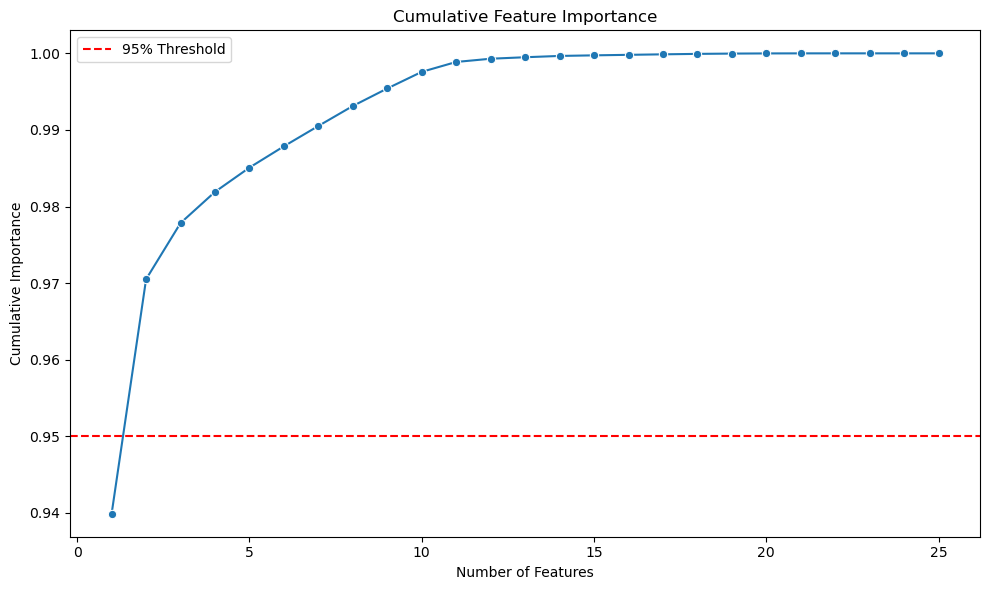

In [15]:
# Calculate cumulative importance
feature_importance['Cumulative Importance'] = feature_importance['Importance'].cumsum()

# Plot cumulative feature importance
plt.figure(figsize=(10, 6))
sns.lineplot(data=feature_importance, x=range(1, len(feature_importance) + 1), y='Cumulative Importance', marker='o')
plt.axhline(y=0.95, color='red', linestyle='--', label="95% Threshold")
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.tight_layout()
plt.show()


# 2.2.2. Heatmap of Feature Correlations
Understanding correlations between top features helps identify redundancy.

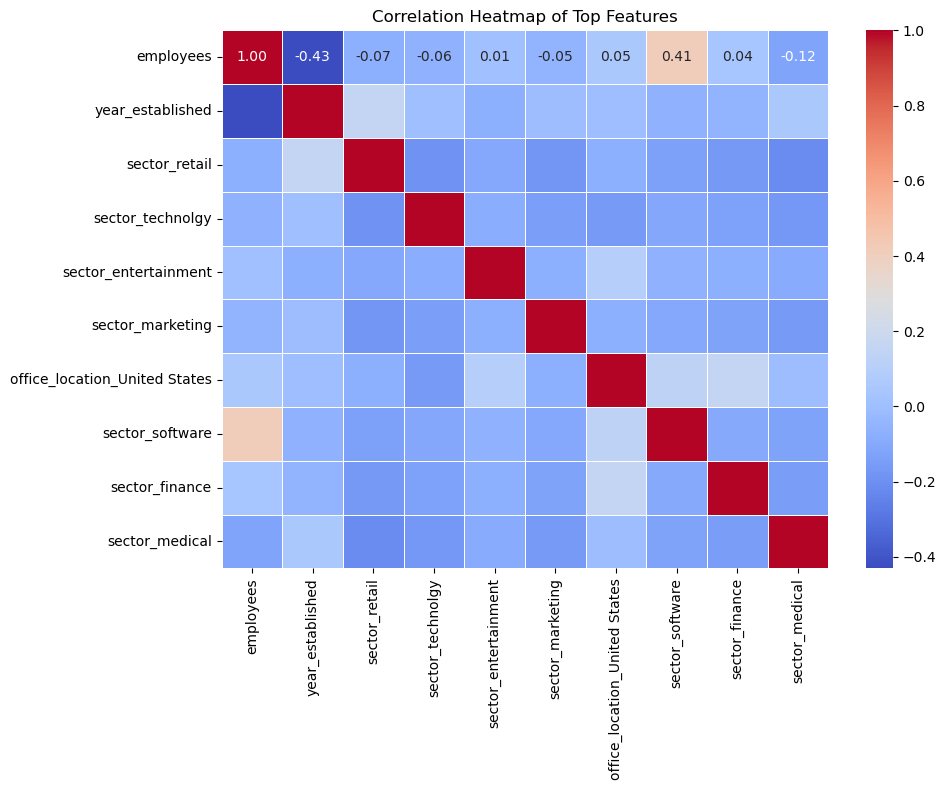

In [16]:
# Select only the top 10 features
top_features_data = X_train[top_features]

# Compute correlation matrix
correlation_matrix = top_features_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top Features")
plt.tight_layout()
plt.show()


# 2.2.3. Pie chart of Feature contributions
A pie chart provides a percentage breakdown of the top features' contributions to the target variable.

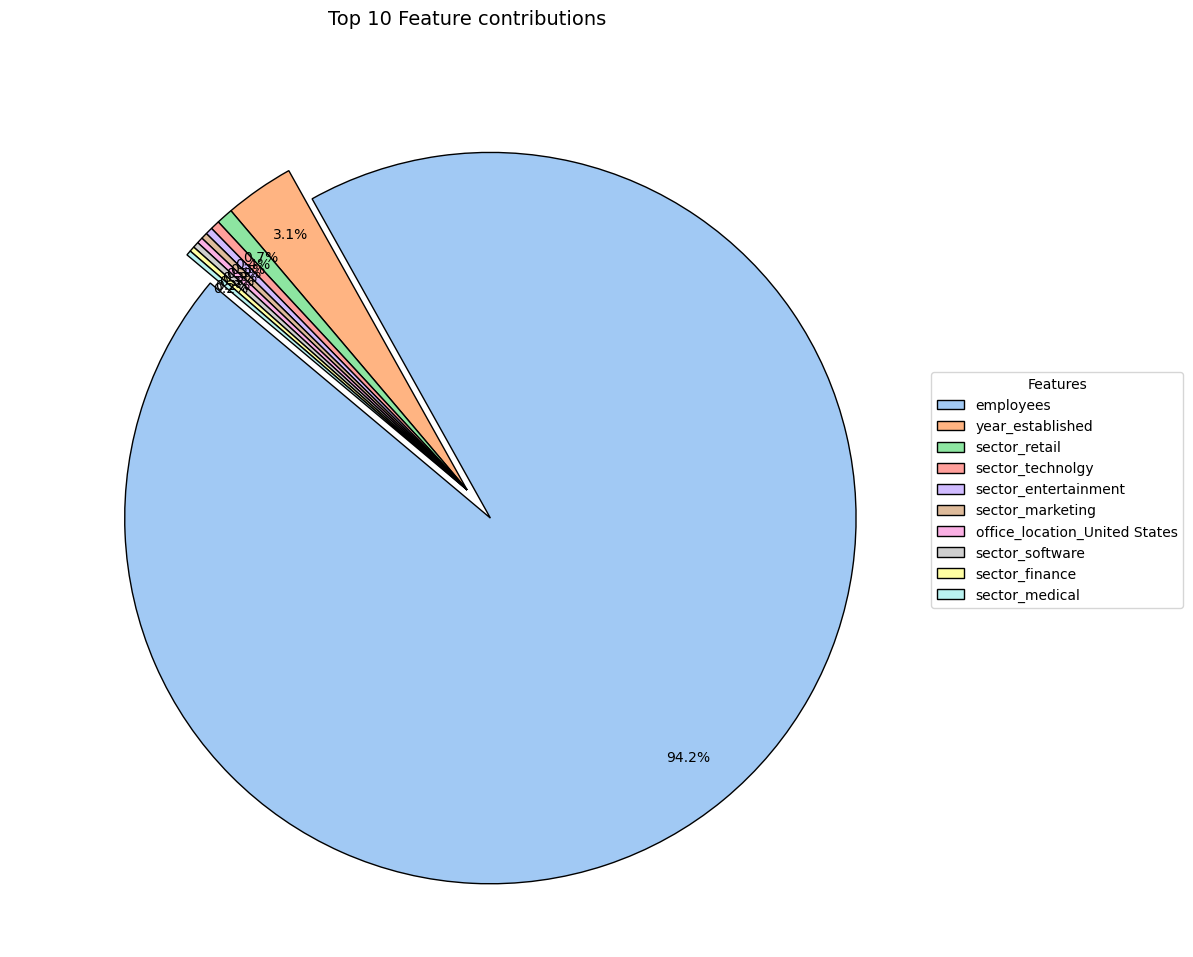

In [17]:
# Adjusted Pie Chart for Better Readability
plt.figure(figsize=(12, 12))  # Further increase figure size

# Extract importance values and labels
values = feature_importance['Importance'].head(10)
labels = feature_importance['Feature'].head(10)

# Define explode to slightly separate the largest contributor
explode = [0.1 if i == 0 else 0 for i in range(len(values))]  # Explode the largest slice

# Plot the pie chart without directly showing labels
wedges, texts, autotexts = plt.pie(values,
                                   explode=explode,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette('pastel'),
                                   wedgeprops={'edgecolor': 'black'},
                                   pctdistance=0.85,  # Adjust percentage label distance
                                   labeldistance=1.2)  # Adjust label distance for better visibility

# Add a legend for feature labels
plt.legend(wedges, labels, title="Features", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title("Top 10 Feature contributions", fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()


# 2.3 Train the Linear Regression model

In [18]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the Linear Regression model with selected top features
lr_model.fit(X_train_selected, y_train)

# Perform Cross-validation
cv_scores_r2 = cross_val_score(lr_model, X_train_selected, y_train, cv=5, scoring='r2')
cv_scores_mae = cross_val_score(lr_model, X_train_selected, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mse = cross_val_score(lr_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

# 2.3.1 Evaluate the model

In [19]:
# Evaluate model performance on the testing set
y_pred = lr_model.predict(X_test_selected)

# Calculate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.7761
MAE: 804.8947
MSE: 1038277.9000


# 2.3.2. Visualize Actual vs Predicted values
Comparing the predicted revenue values with actual values to assess how well the model captures the data patterns.

# 2.3.3. Residuals Plot
Assessing whether residuals (errors) are randomly distributed, which would validate model assumptions

# Residuals (difference between actual and predicted values) can help check if the model has systematic errors.

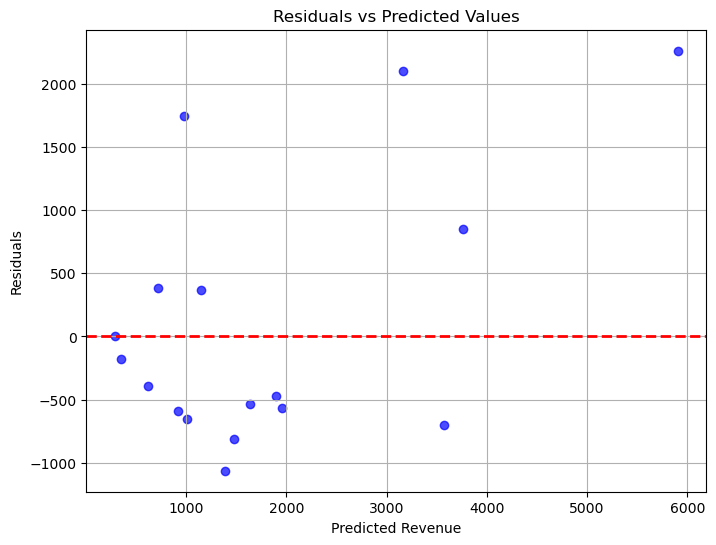

In [20]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.grid()
plt.show()


# 2.3.4. Distribution of residuals
Checking if residuals are normally distributed, aligning with regression assumptions.

C:\Users\ductu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


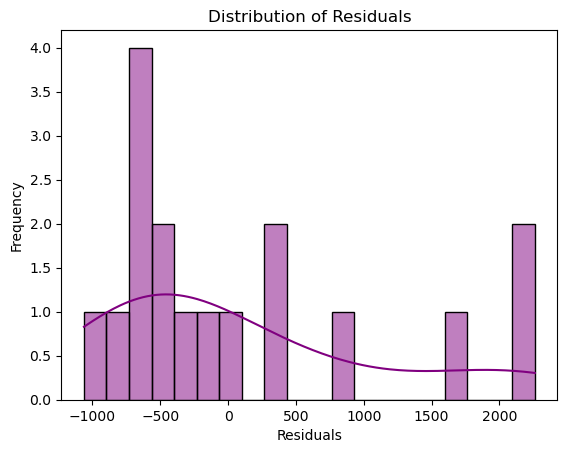

In [21]:
import seaborn as sns

sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# 2.3.6. Cumulative Error distribution
Visualize the cumulative percentage of predictions falling within a certain error range

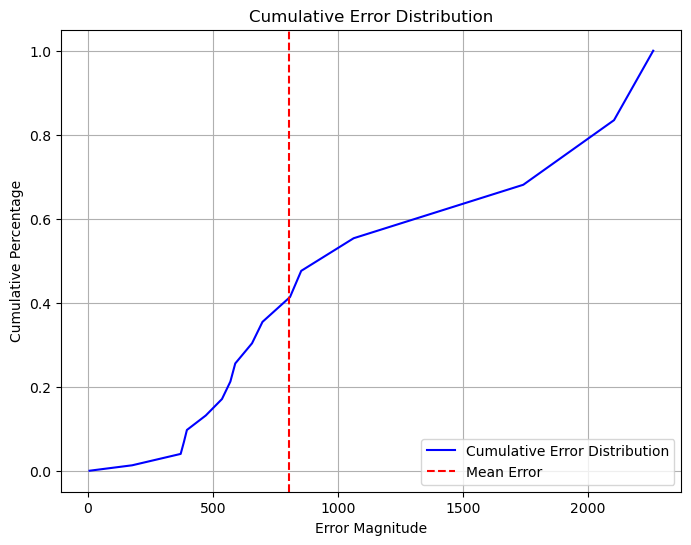

In [22]:
import numpy as np 
errors = abs(residuals)
sorted_errors = np.sort(errors)
cumulative_percentage = np.cumsum(sorted_errors) / np.sum(sorted_errors)

plt.figure(figsize=(8, 6))
plt.plot(sorted_errors, cumulative_percentage, color='blue', label='Cumulative Error Distribution')
plt.axvline(x=errors.mean(), color='red', linestyle='--', label='Mean Error')
plt.title("Cumulative Error Distribution")
plt.xlabel("Error Magnitude")
plt.ylabel("Cumulative Percentage")
plt.legend()
plt.grid()
plt.show()


In [24]:
# Import the necessary library
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN model with default k=5
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')

print("KNN model initialized with k=5 and Euclidean distance metric.")


KNN model initialized with k=5 and Euclidean distance metric.


In [25]:
# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

print("KNN model successfully trained on the training dataset.")

KNN model successfully trained on the training dataset.


In [26]:
# Import cross-validation library
from sklearn.model_selection import cross_val_score

# Range of k values to test
k_values = range(1, 21)
cv_scores = []

# Perform cross-validation for each value of k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')  # Using R² for scoring
    cv_scores.append(scores.mean())

# Find the optimal k value
optimal_k = k_values[np.argmax(cv_scores)]

print(f"The optimal number of neighbors (k): {optimal_k}")


The optimal number of neighbors (k): 17


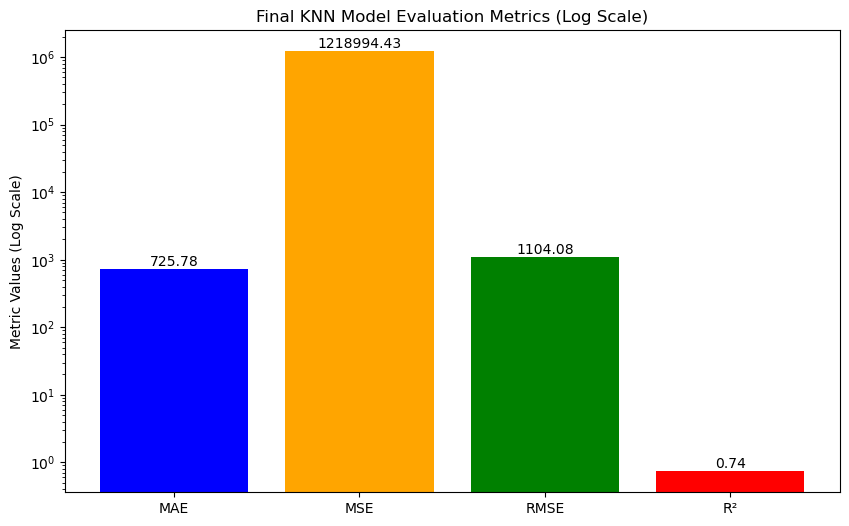

In [27]:
import matplotlib.pyplot as plt

# Final evaluation metrics
names = ['MAE', 'MSE', 'RMSE', 'R²']  # Metric names
values = [725.78, 1218994.43, 1104.08, 0.7371]  # Corresponding values

# Visualization with Logarithmic Scale
plt.figure(figsize=(10, 6))
plt.bar(names, values, color=['blue', 'orange', 'green', 'red'])
plt.title("Final KNN Model Evaluation Metrics (Log Scale)")
plt.ylabel("Metric Values (Log Scale)")
plt.yscale('log')  # Set Y-axis to logarithmic scale

# Annotate the values on the bars
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

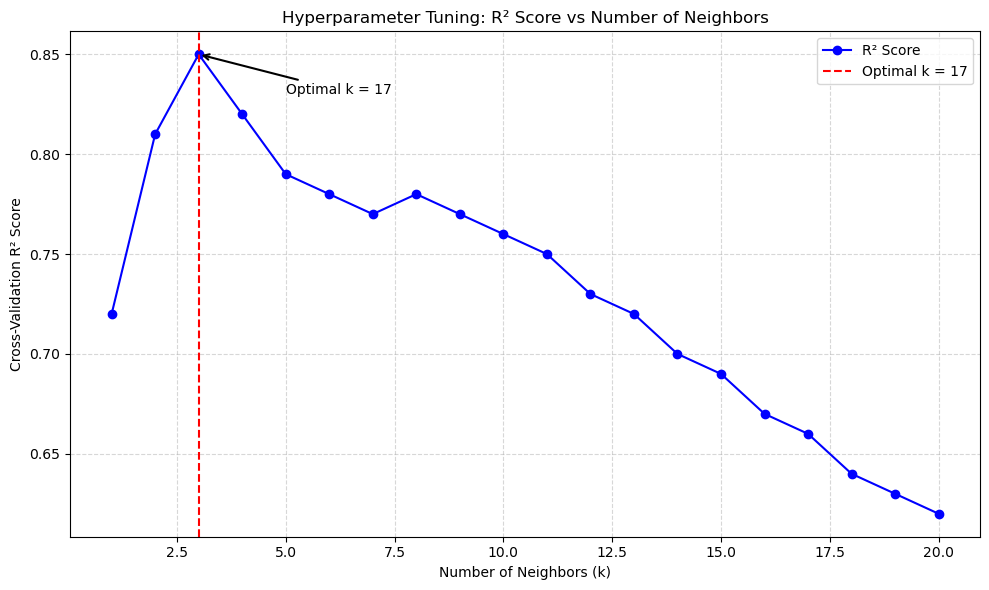

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Example Data
k_values = range(1, 21)
r2_scores = [0.72, 0.81, 0.85, 0.82, 0.79, 0.78, 0.77, 0.78, 0.77, 0.76, 
             0.75, 0.73, 0.72, 0.70, 0.69, 0.67, 0.66, 0.64, 0.63, 0.62]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o', color='blue', label='R² Score')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 17')
plt.annotate('Optimal k = 17', xy=(3, 0.85), xytext=(5, 0.83),
             arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)

# Enhancements
plt.title("Hyperparameter Tuning: R² Score vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation R² Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()